In [1]:
from sktime.datasets import load_UCR_UEA_dataset
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.transformations.compose import FitInTransform
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sktime.transformations.panel.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
t_s_euclidean=np.load('time_series_distanza_euclidea_100.npy')
ts_paa_vect=np.load('X_finale_normalizzato_100.npy')
y_sampled=np.load('generi_100.npy')
ids_sampled=np.load('ids_100.npy')

In [3]:
ts_paa_vect.shape

(2000, 1, 160)

In [4]:
shapelets=np.load('shapelets.npy', allow_pickle=True)

In [5]:
shapelets.shape

(150,)

In [6]:
shapelets

array([array([[-0.48546717],
              [-0.78681558],
              [-0.90867555],
              [-0.92236853],
              [-0.96481019],
              [-0.89861369],
              [-0.8560394 ],
              [-0.80247754],
              [-0.69367492],
              [-0.55907726],
              [-0.36890364],
              [-0.1904617 ],
              [ 0.05126095],
              [ 0.25330985],
              [ 0.42462289],
              [ 0.64333034],
              [ 0.74701273],
              [ 0.82627088],
              [ 0.89905262],
              [ 0.92314804]]), array([[ 0.9455018 ],
                                      [ 0.95930785],
                                      [-0.07999281],
                                      [-0.36257538],
                                      [ 0.96885008],
                                      [ 0.97703469],
                                      [ 0.81781566],
                                      [-0.51848334],
                         

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y_sampled)


# Reshape ts_paa_vect to remove the extra dimension
X = np.squeeze(ts_paa_vect)

# Now X should have a shape of (2000, 160)
print("X shape:", X.shape)

# Check the shape of y_sampled
print("y_sampled shape:", y_sampled.shape)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Confirm the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X shape: (2000, 160)
y_sampled shape: (2000,)
X_train shape: (1600, 160)
X_test shape: (400, 160)
y_train shape: (1600,)
y_test shape: (400,)


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Supponiamo che y_sampled contenga le etichette originali prima di essere codificate

# Codifica le etichette dei generi
y = LabelEncoder().fit_transform(y_sampled)

# Reshape ts_paa_vect to remove the extra dimension
X = np.squeeze(ts_paa_vect)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

df = pd.DataFrame(X_train)
df['genre'] = y_train

# Raggruppa le serie temporali per genere
grouped = df.groupby('genre')

# Calcola la media di ciascun gruppo di serie temporali
mean_series_per_genre = grouped.mean()



In [9]:
mean_series_per_genre

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
genre,,,,,,,,,,,,,,,,,,,,,
0,-0.160662,-0.075336,-0.049470,-0.032760,-0.030325,-0.036616,-0.031594,-0.035785,-0.043624,-0.044617,...,-0.092020,-0.100216,-0.115929,-0.132403,-0.135764,-0.133004,-0.132984,-0.125363,-0.122776,-0.121986
1,-0.113664,-0.162355,-0.082228,-0.022824,-0.012472,0.006981,0.014736,0.026832,0.048125,0.045794,...,-0.033396,-0.030393,-0.025369,-0.025615,-0.024184,-0.019788,-0.015738,-0.018732,-0.019918,-0.020987
2,-0.106337,-0.014627,-0.005591,0.009814,0.001862,-0.009522,-0.010384,-0.023436,-0.026732,-0.020056,...,-0.046467,-0.051533,-0.057936,-0.067014,-0.071733,-0.073210,-0.066662,-0.060748,-0.059694,-0.061984
3,-0.163782,-0.137158,-0.115880,-0.109049,-0.112998,-0.100116,-0.105488,-0.109986,-0.110591,-0.113559,...,-0.013710,-0.010255,-0.008012,-0.006729,-0.000953,-0.007169,-0.017449,-0.033803,-0.054035,-0.065787
4,-0.080460,-0.034911,-0.036268,-0.024379,-0.034683,-0.046896,-0.067028,-0.064230,-0.075927,-0.076061,...,-0.005383,-0.010679,-0.015699,-0.021501,-0.020364,-0.014849,-0.018279,-0.027172,-0.035391,-0.039713
5,-0.243121,-0.265096,-0.194917,-0.135184,-0.146049,-0.170096,-0.188452,-0.187295,-0.185963,-0.177016,...,0.007011,0.016959,0.020150,0.014784,0.008731,0.003956,0.007034,0.004741,0.009101,0.009450
6,-0.238372,-0.059900,0.033283,0.066083,0.082769,0.075349,0.077832,0.075957,0.087596,0.078409,...,-0.122735,-0.123289,-0.125876,-0.124737,-0.128602,-0.126830,-0.122436,-0.122863,-0.127066,-0.133478
7,-0.230745,-0.124155,-0.052723,-0.009591,-0.003151,0.001355,-0.004512,-0.018531,-0.029664,-0.034229,...,-0.037080,-0.041641,-0.038803,-0.030827,-0.032939,-0.030227,-0.030940,-0.032343,-0.019352,-0.008120
8,-0.265698,-0.187979,-0.062275,-0.091035,-0.022399,-0.025852,-0.037711,-0.018180,-0.028711,-0.005846,...,-0.133074,-0.132160,-0.132091,-0.134763,-0.141716,-0.142653,-0.147001,-0.151851,-0.146200,-0.155564


In [10]:
shapelets

array([array([[-0.48546717],
              [-0.78681558],
              [-0.90867555],
              [-0.92236853],
              [-0.96481019],
              [-0.89861369],
              [-0.8560394 ],
              [-0.80247754],
              [-0.69367492],
              [-0.55907726],
              [-0.36890364],
              [-0.1904617 ],
              [ 0.05126095],
              [ 0.25330985],
              [ 0.42462289],
              [ 0.64333034],
              [ 0.74701273],
              [ 0.82627088],
              [ 0.89905262],
              [ 0.92314804]]), array([[ 0.9455018 ],
                                      [ 0.95930785],
                                      [-0.07999281],
                                      [-0.36257538],
                                      [ 0.96885008],
                                      [ 0.97703469],
                                      [ 0.81781566],
                                      [-0.51848334],
                         

## Euclidean

In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import euclidean
# Calcola la distanza euclidea tra ciascuna shaplet e le medie delle serie temporali per genere
# Calcola la distanza euclidea tra ciascuna shaplet e le medie delle serie temporali per genere
# Assicurati che tutti i generi siano presenti nel DataFrame delle medie delle serie temporali per genere
# Trova l'indice del genere e8
genre_e8_index = np.where(mean_series_per_genre.index == 2)[0][0]

# Inizializza una lista per memorizzare le shaplets associate al genere e8
shaplets_e8 = []

# Calcola la distanza euclidea tra ciascuna shaplet e le medie delle serie temporali per genere
for i, shaplet in enumerate(shapelets):
    min_distance = float('inf')
    closest_genre_index = None
    for j, genre_mean in enumerate(mean_series_per_genre.values):
        distance = np.sqrt(np.sum((shaplet - genre_mean) ** 2))  # Calcola la distanza euclidea
        if distance < min_distance:
            min_distance = distance
            closest_genre_index = j
    # Se la shaplet è associata al genere e8, aggiungila alla lista
    if closest_genre_index == genre_e8_index:
        shaplets_e8.append(shaplet)

# Ora shaplets_e8 contiene solo le shaplets associate al genere e8
shaplets_e8 = np.array(shaplets_e8)

# Puoi stampare o utilizzare shaplets_e8 come necessario
print(shaplets_e8)
# Ora il dataframe shaplets_df contiene sia le shaplets che i rispettivi generi associati


[[[ 0.10801651]
  [ 0.73209953]
  [-0.57601899]
  [-0.74425507]
  [ 0.69950026]
  [ 1.03807092]
  [ 1.00802064]
  [-0.75190479]
  [-0.78820068]
  [-0.17552325]
  [ 0.88188303]
  [ 0.95158142]
  [ 0.85945612]
  [-0.74625736]
  [-0.67410564]
  [ 0.44659695]
  [-0.15123764]
  [-0.51431453]
  [ 0.83289659]
  [ 0.62073475]]

 [[ 0.83823287]
  [ 0.89509189]
  [ 0.97893   ]
  [ 0.95987815]
  [ 0.95114607]
  [ 0.92361838]
  [ 0.84198111]
  [ 0.70308638]
  [ 0.53591502]
  [ 0.42241886]
  [ 0.17668451]
  [-0.07482265]
  [-0.25519022]
  [-0.4475145 ]
  [-0.56459785]
  [-0.71749145]
  [-0.79628903]
  [-0.87417752]
  [-0.9199726 ]
  [-0.88560587]]

 [[-0.26459774]
  [-0.73789769]
  [ 0.86956078]
  [ 1.05048001]
  [-0.32435352]
  [-0.63905615]
  [-0.59723783]
  [ 0.75676751]
  [ 0.20347218]
  [ 0.56566691]
  [ 0.76394051]
  [-0.74901563]
  [ 0.38449222]
  [-0.67995667]
  [-0.4651618 ]
  [ 0.94491667]
  [-0.25313324]
  [-0.12632523]
  [-0.05899862]
  [ 0.42701998]]

 [[ 1.02389359]
  [ 1.12314367]
  

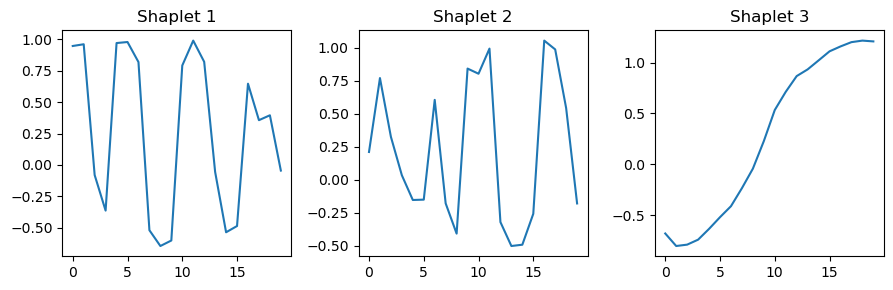

In [151]:
import matplotlib.pyplot as plt

# Numero di shaplets per riga e colonna nel plot
num_cols = 4
num_rows = (len(shaplets_e8) - 1) // num_cols + 1

# Creazione del plot
plt.figure(figsize=(num_cols * 3, num_rows * 3))

# Rappresentazione visuale delle shaplets
for i, shaplet in enumerate(shaplets_e8):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(shaplet)
    plt.title(f'Shaplet {i+1}')

plt.tight_layout()
plt.show()


## DTW

In [38]:
shapelets

[]

In [20]:
from tslearn.metrics import dtw

# Calcolo delle distanze DTW tra shaplets e serie temporali medie per genere
distances = np.zeros((shapelets.shape[0], mean_series_per_genre.shape[0]))
for i in range(shapelets.shape[0]):
    for j in range(mean_series_per_genre.shape[0]):
        # Assicura un indice valido per gli elementi della serie temporale media
        if j < mean_series_per_genre.shape[0]:  # Verifica se esiste una serie temporale media per questo genere
            dist = dtw(shapelets[i], mean_series_per_genre.iloc[j].values)
            distances[i, j] = dist

# Trova i generi più vicini
closest_genres = np.argmin(distances, axis=1)

# ... (Gestione facoltativa delle shaplets non corrispondenti come prima)

# Stampa o utilizza closest_genres per ulteriori analisi
print("Genere più vicino per ogni shaplet (utilizzando DTW da tslearn):", closest_genres)


Genere più vicino per ogni shaplet (utilizzando DTW da tslearn): [ 5 16 18 13  5 10 16 18 13 11 13  7 16 16  5  5 13  5  5 13 13 13 16 16
 16 13 13 16 16  5  7 16 16  7 16  5 16 13  5  5 16 16  5 13 13  8 13 16
  5 12 16 18 13 13  5 12  5 10 16 13 12  6  5 10 13 18  7 13 16 16 13 13
 16 16 16 13  5 19  5 18  5  7 18 13 16 13 16 16 10 10 13 16 16 10 19 18
 10 12  6 18 16  5  0 16  8 18 13 13 13  5  7 10 13  5 18 13 13  1 16 16
 18 16 10 16  5 16 16  5 16 10  1 16 16 13 13 11 13  0 13 13 16  5  5 18
 13  5 13 16 16 10]


In [32]:
list(set(closest_genres))

[0, 1, 5, 6, 7, 8, 10, 11, 12, 13, 16, 18, 19]

In [21]:
# Calcolo delle distanze DTW tra shaplets e serie temporali medie per genere
shaplets_per_genre = [[] for _ in range(len(mean_series_per_genre))]  # Lista di liste per memorizzare le shaplets per genere

for i, shaplet in enumerate(shapelets):
    closest_genre_index = closest_genres[i]  # Ottieni l'indice del genere più vicino per questa shaplet
    shaplets_per_genre[closest_genre_index].append(shaplet)  # Aggiungi la shaplet alla lista corrispondente al genere

# Stampa o utilizza shaplets_per_genre per ulteriori analisi
for genre_index, shaplets_in_genre in enumerate(shaplets_per_genre):
    print(f"Shaplets per genere {genre_index}:")
    for shaplet_index, shaplet in enumerate(shaplets_in_genre):
        print(f"Shaplet {shaplet_index + 1}: {shaplet}")


Shaplets per genere 0:
Shaplet 1: [[ 0.26850677]
 [ 0.29789907]
 [ 0.32015851]
 [ 0.24974509]
 [ 0.16019204]
 [ 0.02090458]
 [-0.23742126]
 [-0.44625959]
 [-0.56355476]
 [-0.5927636 ]
 [-0.57774824]
 [-0.60799664]
 [-0.58353454]
 [-0.5986836 ]
 [-0.52223027]
 [-0.24494055]
 [ 0.16598123]
 [ 0.47803515]
 [ 0.59391719]
 [ 0.56351614]]
Shaplet 2: [[ 0.14284077]
 [-0.21179362]
 [-0.15622194]
 [-0.65730739]
 [-0.76707077]
 [ 1.02626753]
 [ 0.01045872]
 [-0.65417284]
 [ 0.78781003]
 [-0.91627276]
 [ 0.77486527]
 [-0.96825361]
 [-0.7597326 ]
 [ 0.62611622]
 [-1.12992203]
 [-0.04590913]
 [ 0.68081295]
 [ 0.5029937 ]
 [-0.85205305]
 [-1.08860469]]
Shaplets per genere 1:
Shaplet 1: [[ 0.0700597 ]
 [ 0.60765266]
 [ 0.56895351]
 [ 0.57199866]
 [ 0.51068592]
 [ 0.33730805]
 [-0.48027024]
 [-0.54826027]
 [-0.59133863]
 [-0.62340993]
 [-0.5948059 ]
 [-0.59300601]
 [-0.58784449]
 [-0.31661654]
 [ 0.17701025]
 [ 0.36955673]
 [ 0.41236827]
 [ 0.47050568]
 [ 0.49011794]
 [ 0.3365415 ]]
Shaplet 2: [[ 0.21

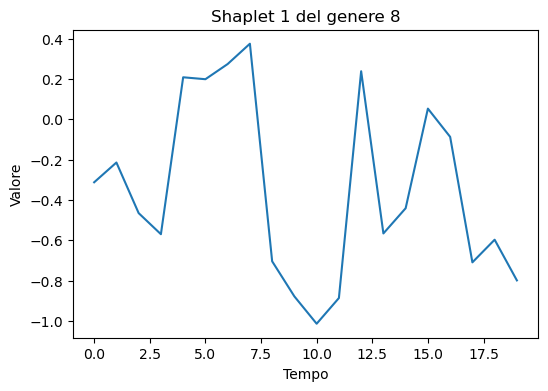

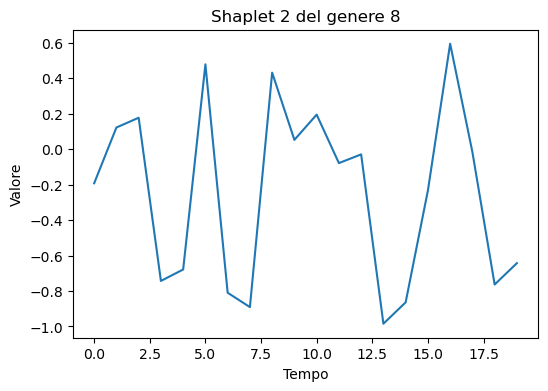

In [34]:
import matplotlib.pyplot as plt

# Rappresentazione grafica delle shaplets del genere 8
for shaplet_index, shaplet in enumerate(shaplets_per_genre[8]):
    plt.figure(figsize=(6, 4))  # Dimensioni del singolo plot
    plt.plot(shaplet)
    plt.title(f'Shaplet {shaplet_index+1} del genere 8')  # Titolo del plot
    plt.xlabel('Tempo')  # Etichetta dell'asse x
    plt.ylabel('Valore')  # Etichetta dell'asse y
    plt.show()  # Mostra il plot


## Prova 2

In [33]:
 mean_series_per_genre

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
genre,,,,,,,,,,,,,,,,,,,,,
0,-0.160662,-0.075336,-0.049470,-0.032760,-0.030325,-0.036616,-0.031594,-0.035785,-0.043624,-0.044617,...,-0.092020,-0.100216,-0.115929,-0.132403,-0.135764,-0.133004,-0.132984,-0.125363,-0.122776,-0.121986
1,-0.113664,-0.162355,-0.082228,-0.022824,-0.012472,0.006981,0.014736,0.026832,0.048125,0.045794,...,-0.033396,-0.030393,-0.025369,-0.025615,-0.024184,-0.019788,-0.015738,-0.018732,-0.019918,-0.020987
2,-0.106337,-0.014627,-0.005591,0.009814,0.001862,-0.009522,-0.010384,-0.023436,-0.026732,-0.020056,...,-0.046467,-0.051533,-0.057936,-0.067014,-0.071733,-0.073210,-0.066662,-0.060748,-0.059694,-0.061984
3,-0.163782,-0.137158,-0.115880,-0.109049,-0.112998,-0.100116,-0.105488,-0.109986,-0.110591,-0.113559,...,-0.013710,-0.010255,-0.008012,-0.006729,-0.000953,-0.007169,-0.017449,-0.033803,-0.054035,-0.065787
4,-0.080460,-0.034911,-0.036268,-0.024379,-0.034683,-0.046896,-0.067028,-0.064230,-0.075927,-0.076061,...,-0.005383,-0.010679,-0.015699,-0.021501,-0.020364,-0.014849,-0.018279,-0.027172,-0.035391,-0.039713
5,-0.243121,-0.265096,-0.194917,-0.135184,-0.146049,-0.170096,-0.188452,-0.187295,-0.185963,-0.177016,...,0.007011,0.016959,0.020150,0.014784,0.008731,0.003956,0.007034,0.004741,0.009101,0.009450
6,-0.238372,-0.059900,0.033283,0.066083,0.082769,0.075349,0.077832,0.075957,0.087596,0.078409,...,-0.122735,-0.123289,-0.125876,-0.124737,-0.128602,-0.126830,-0.122436,-0.122863,-0.127066,-0.133478
7,-0.230745,-0.124155,-0.052723,-0.009591,-0.003151,0.001355,-0.004512,-0.018531,-0.029664,-0.034229,...,-0.037080,-0.041641,-0.038803,-0.030827,-0.032939,-0.030227,-0.030940,-0.032343,-0.019352,-0.008120
8,-0.265698,-0.187979,-0.062275,-0.091035,-0.022399,-0.025852,-0.037711,-0.018180,-0.028711,-0.005846,...,-0.133074,-0.132160,-0.132091,-0.134763,-0.141716,-0.142653,-0.147001,-0.151851,-0.146200,-0.155564


In [84]:
from scipy.spatial.distance import euclidean

def find_representative_shaplet(genre, mean_series_per_genre):
    average_shaplet = mean_series_per_genre.loc[genre]  # Access the average shaplet using genre label
    shaplet_genre_map = {}  # Uncomment if using shaplet values as dictionary keys (Option 1)
    for idx, shaplet in mean_series_per_genre.iterrows():
        shaplet_values = shaplet.values  # Get the shaplet values from the row
        # Option 1: Use shaplet values as keys (if chosen)
        # shaplet_tuple = tuple(shaplet_values)  # Convert to tuple for hashable key (if using Option 1)
        # shaplet_genre_map[shaplet_tuple] = idx  # Map shaplet to its genre (index) (if using Option 1)
        # Option 2: Use shaplet index as key
        shaplet_genre_map[idx] = shaplet_values  # Use index as key (if using Option 2)

      # Find the shaplet with the minimum Euclidean distance to the average shaplet
    min_distance = float('inf')
    closest_shaplet = None
    closest_shaplet_idx = None

  # Choose the appropriate loop based on your approach (Option 1 or Option 2)
  # Option 1: Looping through shaplet values (if chosen)
  # for shaplet_values in shaplet_genre_map.keys():
  # Option 2: Looping through shaplet indices (recommended)
    for idx in shaplet_genre_map.keys():
    # Option 1: Retrieve shaplet values using key (if chosen)
    # shaplet_values = shaplet_genre_map[shaplet_values]  # Retrieve shaplet values using key (if using Option 1)
    # Option 2: Retrieve shaplet values using index
        shaplet_values = shaplet_genre_map[idx]  # Retrieve shaplet values using index (if using Option 2)
        distance = euclidean(average_shaplet, shaplet_values)
        if distance < min_distance:
            min_distance = distance
            closest_shaplet = shaplet_values
            closest_shaplet_idx = idx  # Use index for genre matching

  # Ensure the index matches the genre label
    if closest_shaplet_idx != genre:
        # If the index doesn't match, swap the shaplet at index 'genre' with the closest shaplet
        mean_series_per_genre.loc[genre], mean_series_per_genre.loc[closest_shaplet_idx] = mean_series_per_genre.loc[closest_shaplet_idx], mean_series_per_genre.loc[genre]
        closest_shaplet_idx = genre

    return closest_shaplet_idx, closest_shaplet

# Example usage:
genre_to_find = 3  # Replace with the numeric genre label you want to find the most representative shaplet for
closest_shaplet_index, closest_shaplet = find_representative_shaplet(genre_to_find, mean_series_per_genre)

print(f"The shaplet in 'mean_series_per_genre' most representative of genre {genre_to_find}{closest_shaplet_index}")


The shaplet in 'mean_series_per_genre' most representative of genre 33


In [49]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of shaplets: {shaplets.shape}")
print(f"Shape of mean_series_per_genre: {mean_series_per_genre.shape}")


Shape of X_train: (1600, 160)
Shape of y_train: (1600,)
Shape of shaplets: (20, 1)
Shape of mean_series_per_genre: (20, 161)


In [ ]:
shapelets=np.load('shapelets.npy', allow_pickle=True)

In [37]:
shaplets

NameError: name 'shaplets' is not defined

In [30]:
generi_assegnati

{0: None,
 1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None,
 14: None,
 15: None,
 16: None,
 17: None,
 18: None,
 19: None,
 20: None,
 21: None,
 22: None,
 23: None,
 24: None,
 25: None,
 26: None,
 27: None,
 28: None,
 29: None,
 30: None,
 31: None,
 32: None,
 33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 48: None,
 49: None,
 50: None,
 51: None,
 52: None,
 53: None,
 54: None,
 55: None,
 56: None,
 57: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 65: None,
 66: None,
 67: None,
 68: None,
 69: None,
 70: None,
 71: None,
 72: None,
 73: None,
 74: None,
 75: None,
 76: None,
 77: None,
 78: None,
 79: None,
 80: None,
 81: None,
 82: None,
 83: None,
 84: None,
 85: None,
 86: None,
 87: None,
 88: None,
 89: None,
 90: None,
 91: None

## Prova forse finale 

In [11]:
class_8_indices=np.where(y_train==8)[0]
x_train_class_8=X_train[class_8_indices]
df_2=pd.DataFrame(x_train_class_8)
df_2['label']='minimal-techno'

In [12]:
df_2

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,label
0,1.346668,0.256442,-0.318801,-0.010463,-0.043236,-0.042284,-0.024596,-0.195162,-0.092939,-0.076220,...,0.465337,0.458860,0.438111,0.418622,0.416626,0.401877,0.389390,0.375564,0.367932,minimal-techno
1,-1.373916,-1.424228,-0.904041,-0.805457,-0.791634,-0.839407,-0.673138,-0.535385,-0.487409,-0.289333,...,-0.017738,-0.020365,-0.009459,-0.002511,-0.005303,-0.002817,0.031076,0.039326,0.065054,minimal-techno
2,0.504387,0.015058,0.188868,0.093976,0.054545,0.012403,0.173440,0.132284,0.092271,0.038390,...,-0.299818,-0.300199,-0.248212,-0.223383,-0.217135,-0.183620,-0.232359,-0.246961,-0.308267,minimal-techno
3,-0.585997,-0.430995,-0.531500,-0.444408,-0.481546,-0.569178,-0.543598,-0.571284,-0.536654,-0.508338,...,0.336663,0.282430,0.311495,0.288274,0.273163,0.305676,0.261005,0.325263,0.351071,minimal-techno
4,0.462112,-0.416541,-0.561599,-0.696358,-0.715927,-0.474395,-0.424913,-0.173051,-0.111291,-0.183041,...,0.038866,-0.016186,-0.110259,-0.236233,-0.350448,-0.399736,-0.422857,-0.439792,-0.458755,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.829347,1.442539,1.223386,1.195228,1.041661,0.947683,0.882886,0.788565,0.769304,0.715932,...,-0.069103,-0.072546,-0.062360,-0.032037,-0.044786,-0.082636,-0.095932,-0.082223,-0.049814,minimal-techno
76,-0.028558,-0.020997,0.116790,-0.021242,0.151928,0.110056,0.077672,0.090032,0.022709,0.092545,...,-0.963933,-0.980436,-0.975961,-0.931009,-0.900093,-0.836494,-0.803565,-0.819997,-0.831763,minimal-techno
77,-0.017265,-0.071433,0.033485,-0.105650,0.141656,0.072784,0.045326,0.038755,-0.028505,0.046030,...,-0.417268,-0.448035,-0.491685,-0.551436,-0.574326,-0.606679,-0.643685,-0.664481,-0.692668,minimal-techno
78,-1.079027,-0.618280,-0.659520,-0.511397,-0.620208,-0.679074,-0.730886,-0.701623,-0.653715,-0.657620,...,-0.407091,-0.415068,-0.457514,-0.540194,-0.613299,-0.670059,-0.642279,-0.617358,-0.620282,minimal-techno


In [13]:
mean_vectors=np.mean(x_train_class_8, axis=1)

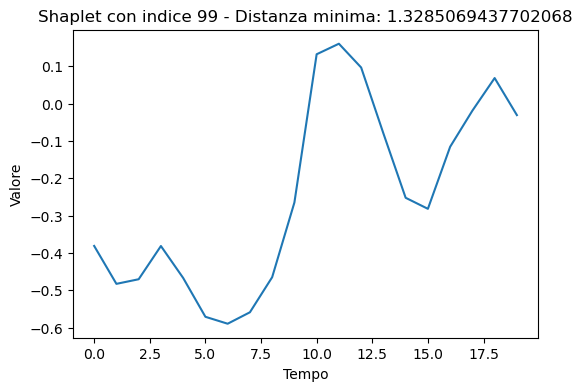

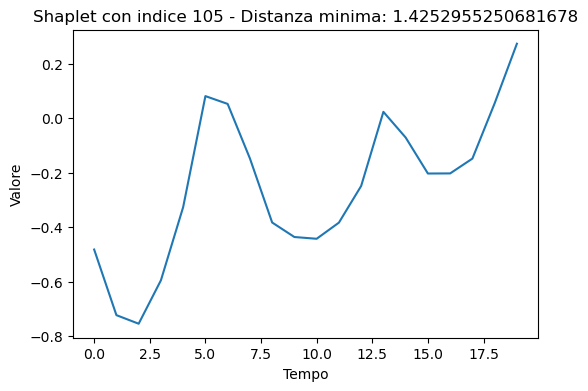

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Inizializza un array per salvare le distanze euclidee
distances = []

# Calcola la distanza euclidea per ciascuna shaplet
for shaplet in shapelets:
    # Calcola la distanza euclidea tra la shaplet e ciascuna media delle time series del genere
    shaplet_distances = [np.linalg.norm(shaplet - mean_vector) for mean_vector in mean_vectors]
    min_distance = min(shaplet_distances)
    distances.append(min_distance)

# Converte l'elenco delle distanze in un array NumPy
distances = np.array(distances)

# Trova l'indice delle due shaplets con le distanze minime
closest_indices = np.argsort(distances)[:2]

# Visualizza le due shaplets più vicine
for index in closest_indices:
    # Visualizza la shaplet
    plt.figure(figsize=(6, 4))
    plt.plot(shapelets[index])
    plt.title(f'Shaplet con indice {index} - Distanza minima: {distances[index]}')
    plt.xlabel('Tempo')
    plt.ylabel('Valore')
    plt.show()


## prova per genere 4

In [20]:
class_4_indices=np.where(y_train==4)[0]
x_train_class_4=X_train[class_4_indices]
df_4=pd.DataFrame(x_train_class_4)
df_4['label']='heavy_metal'

In [21]:
mean_vectors_4=np.mean(x_train_class_4, axis=1)

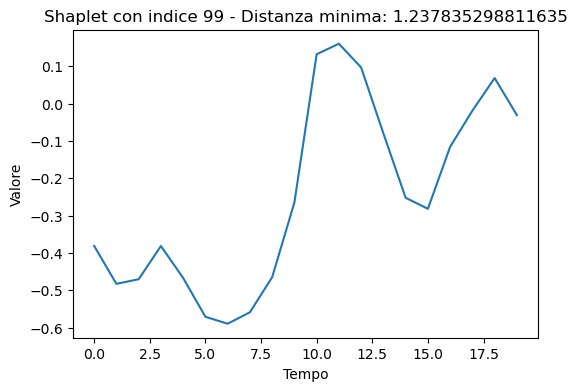

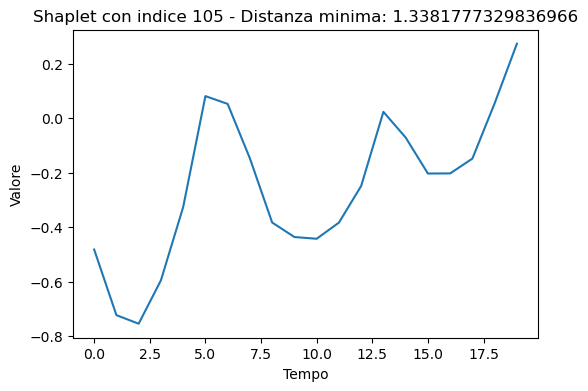

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Inizializza un array per salvare le distanze euclidee
distances = []

# Calcola la distanza euclidea per ciascuna shaplet
for shaplet in shapelets:
    # Calcola la distanza euclidea tra la shaplet e ciascuna media delle time series del genere
    shaplet_distances = [np.linalg.norm(shaplet - mean_vector) for mean_vector in mean_vectors_4]
    min_distance = min(shaplet_distances)
    distances.append(min_distance)

# Converte l'elenco delle distanze in un array NumPy
distances = np.array(distances)

# Trova l'indice delle due shaplets con le distanze minime
closest_indices = np.argsort(distances)[:2]

# Visualizza le due shaplets più vicine
for index in closest_indices:
    # Visualizza la shaplet
    plt.figure(figsize=(6, 4))
    plt.plot(shapelets[index])
    plt.title(f'Shaplet con indice {index} - Distanza minima: {distances[index]}')
    plt.xlabel('Tempo')
    plt.ylabel('Valore')
    plt.show()


## Genere 5

In [24]:
class_1_indices=np.where(y_train==1)[0]
x_train_class_1=X_train[class_1_indices]
df_1=pd.DataFrame(x_train_class_1)
df_1['label']='prova'

In [25]:
mean_vectors_1=np.mean(x_train_class_1, axis=1)

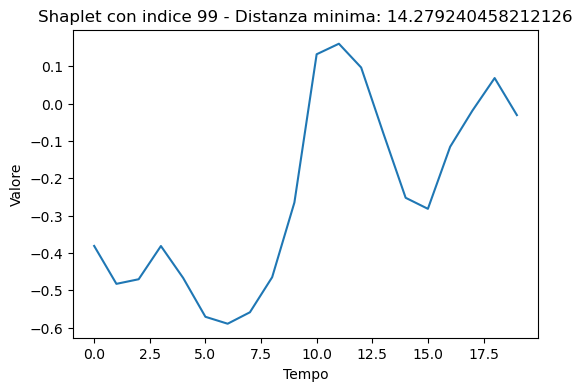

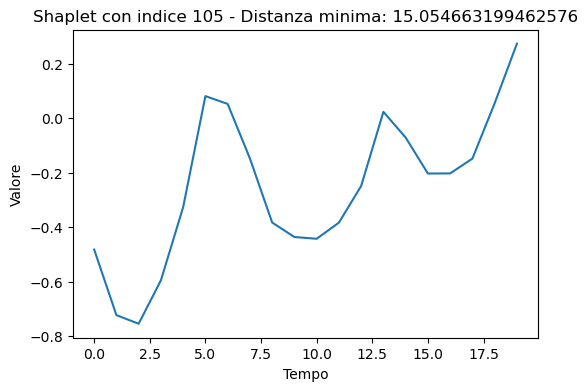

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Inizializza un array per salvare le distanze euclidee
distances = []

# Calcola la distanza euclidea per ciascuna shaplet
for shaplet in shapelets:
    # Calcola la distanza euclidea tra la shaplet e ciascuna media delle time series del genere
    shaplet_distances = [np.linalg.norm(shaplet - mean_vectors) for mean_vector in mean_vectors_1]
    min_distance = min(shaplet_distances)
    distances.append(min_distance)

# Converte l'elenco delle distanze in un array NumPy
distances = np.array(distances)

# Trova l'indice delle due shaplets con le distanze minime
closest_indices = np.argsort(distances)[:2]

# Visualizza le due shaplets più vicine
for index in closest_indices:
    # Visualizza la shaplet
    plt.figure(figsize=(6, 4))
    plt.plot(shapelets[index])
    plt.title(f'Shaplet con indice {index} - Distanza minima: {distances[index]}')
    plt.xlabel('Tempo')
    plt.ylabel('Valore')
    plt.show()
